In [ ]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import random as rnd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
import glob

# Datos Salma

## Unir Archivos entrenar modelo


In [ ]:
# file_list = ['pasivo_der_01.txt', 'pasivo_der_02.txt', 'pasivo_der_03.txt','pasivo_der_04.txt','pasivo_der_05.txt',
#              'pasivo_izq_01.txt','pasivo_izq_02.txt','pasivo_izq_03.txt','pasivo_izq_04.txt','pasivo_izq_05.txt']

# dataframes = []

# for file in file_list:
#     df = pd.read_csv(file, sep='\t')
#     dataframes.append(df)

# df = pd.concat(dataframes, ignore_index=True)
# df.to_csv('archivo_unificado.csv', index=False)


In [ ]:
# Lista de nombres de archivos y etiquetas
file_list = ['pasivo_izq_01.txt','pasivo_izq_02.txt','pasivo_izq_03.txt','pasivo_izq_04.txt','pasivo_izq_05.txt']
exercise_labels = ['Ejercicio 1', 'Ejercicio 2', 'Ejercicio 3', 'Ejercicio 4', 'Ejercicio 5']

# Crear una lista para almacenar los DataFrames
dataframes = []

# Leer cada archivo y agregar la etiqueta correspondiente
for file, label in zip(file_list, exercise_labels):
    dfIzq = pd.read_csv(file, sep='\t')
    # Agregar una columna "Etiqueta" con el nombre del ejercicio
    dfIzq['Etiqueta'] = label
    dataframes.append(dfIzq)

# Concatenar los DataFrames en uno solo
dfIzq = pd.concat(dataframes, ignore_index=True)

# Guardar el DataFrame unificado en un archivo CSV
dfIzq.to_csv('archivo_unificadoIzqPasivo.csv', index=False)

In [ ]:
# Lista de nombres de archivos y etiquetas
file_list = ['pasivo_der_01.txt', 'pasivo_der_02.txt', 'pasivo_der_03.txt', 'pasivo_der_04.txt', 'pasivo_der_05.txt']
exercise_labels = ['Ejercicio 1', 'Ejercicio 2', 'Ejercicio 3', 'Ejercicio 4', 'Ejercicio 5']

# Crear una lista para almacenar los DataFrames
dataframes = []

# Leer cada archivo y agregar la etiqueta correspondiente
for file, label in zip(file_list, exercise_labels):
    dfDer = pd.read_csv(file, sep='\t')
    # Agregar una columna "Etiqueta" con el nombre del ejercicio
    dfDer['Etiqueta'] = label
    dataframes.append(dfDer)

# Concatenar los DataFrames en uno solo
dfDer = pd.concat(dataframes, ignore_index=True)

# Guardar el DataFrame unificado en un archivo CSV
dfDer.to_csv('archivo_unificadoDerPasivo.csv', index=False)

In [ ]:
#df = pd.read_csv('archivo_unificado.csv')

##Eliminacion de variables

In [ ]:
dfIzq = dfIzq.drop(columns=['tau0_01'])
dfIzq = dfIzq.drop(columns=['tau1_01'])
dfIzq = dfIzq.drop(columns=['tau2_01'])

dfIzq = dfIzq.drop(columns=['pydr_01'])
dfIzq = dfIzq.drop(columns=['pxdr_01'])
dfIzq = dfIzq.drop(columns=['pzdr_01'])

dfIzq = dfIzq.drop(columns=['veld1_01'])
dfIzq = dfIzq.drop(columns=['veld2_01'])
dfIzq = dfIzq.drop(columns=['veld3_01'])

#df = df.drop(columns=['pyr_01'])
#df = df.drop(columns=['pxr_01'])
#df = df.drop(columns=['pzr_01'])

#df = df.drop(columns=['vel1_01'])
#df = df.drop(columns=['vel2_01'])
#df = df.drop(columns=['vel3_01'])

dfIzq = dfIzq.drop(columns=['q1r_01'])

#df = df.drop(columns=['tt_01'])


In [ ]:
dfDer = dfDer.drop(columns=['tau0_01'])
dfDer = dfDer.drop(columns=['tau1_01'])
dfDer = dfDer.drop(columns=['tau2_01'])

dfDer = dfDer.drop(columns=['pydr_01'])
dfDer = dfDer.drop(columns=['pxdr_01'])
dfDer = dfDer.drop(columns=['pzdr_01'])

dfDer = dfDer.drop(columns=['veld1_01'])
dfDer = dfDer.drop(columns=['veld2_01'])
dfDer = dfDer.drop(columns=['veld3_01'])

#df = df.drop(columns=['pyr_01'])
#df = df.drop(columns=['pxr_01'])
#df = df.drop(columns=['pzr_01'])

#df = df.drop(columns=['vel1_01'])
#df = df.drop(columns=['vel2_01'])
#df = df.drop(columns=['vel3_01'])

dfDer = dfDer.drop(columns=['q1r_01'])

#df = df.drop(columns=['tt_01'])

In [ ]:
dfDer['H'] = pd.to_numeric(dfDer['H'], errors='coerce')

In [ ]:
dfIzq['H'] = pd.to_numeric(dfIzq['H'], errors='coerce')


In [ ]:
dfDer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tt_01,11163.0,11.171578,6.469043,0.000000,5.580000,1.116000e+01,16.740000,23.600000
pxr_01,11163.0,0.001822,0.013749,-0.019185,-0.012293,3.862741e-03,0.016098,0.023039
pyr_01,11163.0,-0.156115,0.001939,-0.164576,-0.157091,-1.557767e-01,-0.154812,-0.152794
pzr_01,11163.0,0.004198,0.012401,-0.017977,-0.007603,6.127808e-03,0.015727,0.030098
vel1_01,11163.0,-0.000069,0.007821,-0.094521,-0.000004,8.419589e-09,0.000136,0.066406
vel2_01,11163.0,-0.000067,0.006132,-0.152574,-0.000026,0.000000e+00,0.000004,0.192838
vel3_01,11163.0,0.000257,0.010168,-0.400711,-0.000035,1.198648e-11,0.000247,0.228018
H,8882.0,-0.000470,0.002434,-0.005894,-0.002060,-4.309907e-04,0.001165,0.135018


In [ ]:
dfIzq.isnull().sum()

tt_01       0
pxr_01      0
pyr_01      0
pzr_01      0
vel1_01     0
vel2_01     0
vel3_01     0
H           0
Etiqueta    0
dtype: int64

In [ ]:
dfDer.isnull().sum()

tt_01          0
pxr_01         0
pyr_01         0
pzr_01         0
vel1_01        0
vel2_01        0
vel3_01        0
H           2281
Etiqueta       0
dtype: int64

In [ ]:
dfDer = dfDer.dropna(subset=['H'])
dfIzq = dfIzq.dropna(subset=['H'])


## Atipicos

<ipython-input-11-f61691bdf216>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dfIzq.quantile(0.25)
<ipython-input-11-f61691bdf216>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dfIzq.quantile(0.75)
<ipython-input-11-f61691bdf216>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfIzq = dfIzq[~((dfIzq < (Q1 - outlier_threshold * IQR)) | (dfIzq > (Q3 + outlier_threshold * IQR))).any(axis=1)]


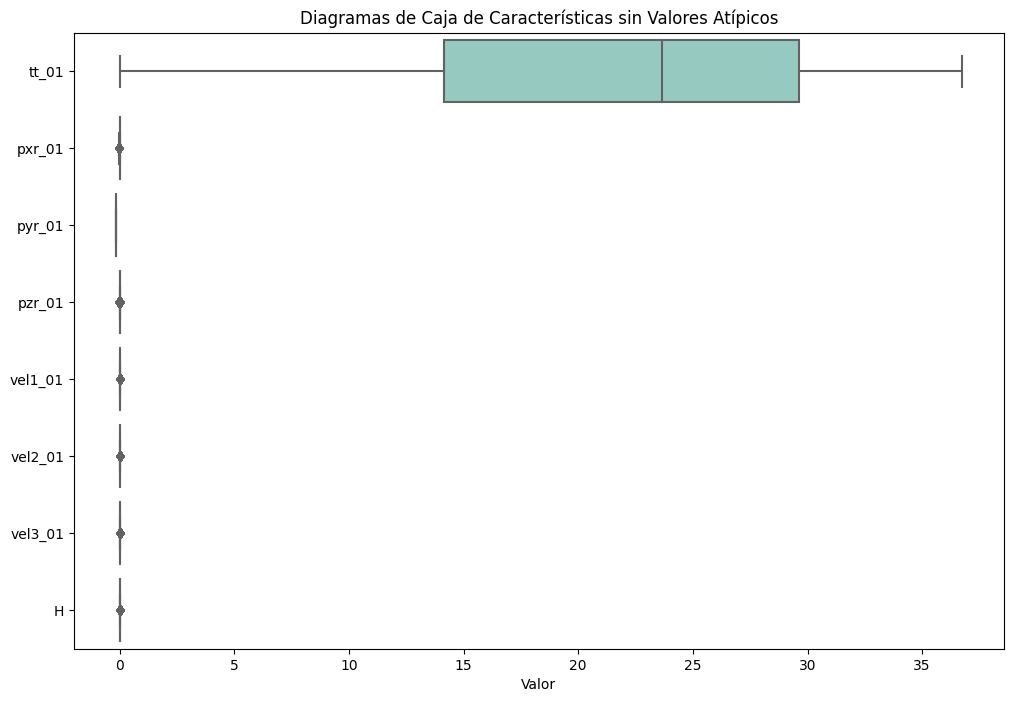

In [ ]:
Q1 = dfIzq.quantile(0.25)
Q3 = dfIzq.quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral para identificar valores atípicos
outlier_threshold = 1.5

# Filtrar los valores atípicos
dfIzq = dfIzq[~((dfIzq < (Q1 - outlier_threshold * IQR)) | (dfIzq > (Q3 + outlier_threshold * IQR))).any(axis=1)]

# Crear diagramas de caja para las características filtradas
plt.figure(figsize=(12, 8))
sns.boxplot(data=dfIzq, orient='h', palette='Set3')
plt.title('Diagramas de Caja de Características sin Valores Atípicos')
plt.xlabel('Valor')
plt.show()

<ipython-input-12-08d9e3bf0e74>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dfDer.quantile(0.25)
<ipython-input-12-08d9e3bf0e74>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dfDer.quantile(0.75)
<ipython-input-12-08d9e3bf0e74>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfDer = dfDer[~((dfDer < (Q1 - outlier_threshold * IQR)) | (dfDer > (Q3 + outlier_threshold * IQR))).any(axis=1)]


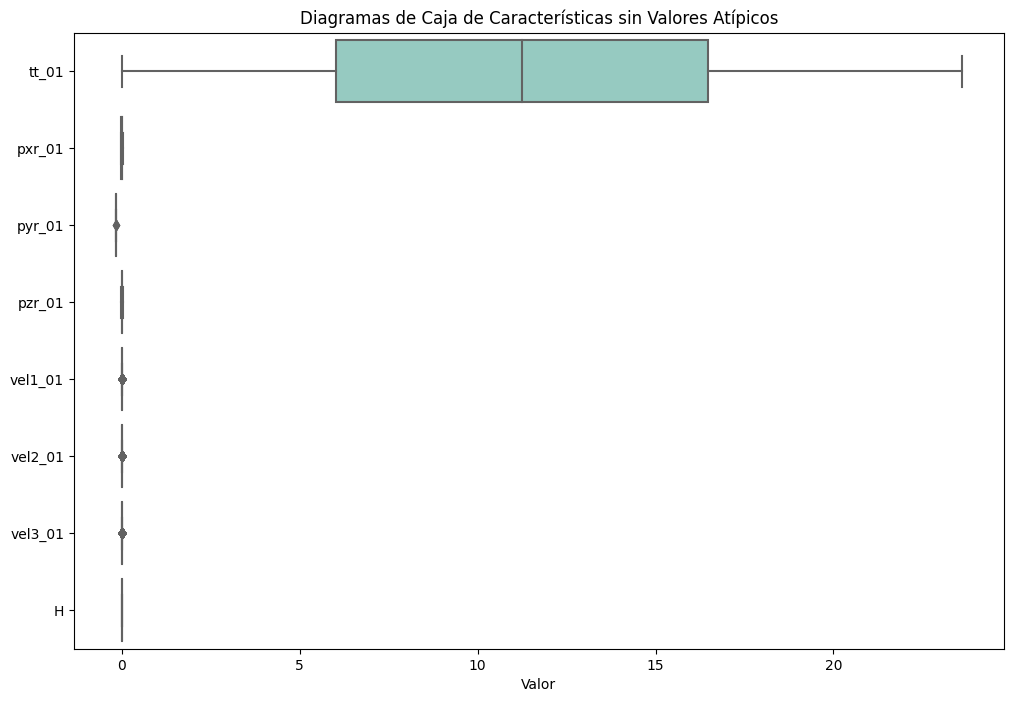

In [ ]:
Q1 = dfDer.quantile(0.25)
Q3 = dfDer.quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral para identificar valores atípicos
outlier_threshold = 1.5

# Filtrar los valores atípicos
dfDer = dfDer[~((dfDer < (Q1 - outlier_threshold * IQR)) | (dfDer > (Q3 + outlier_threshold * IQR))).any(axis=1)]

# Crear diagramas de caja para las características filtradas
plt.figure(figsize=(12, 8))
sns.boxplot(data=dfDer , orient='h', palette='Set3')
plt.title('Diagramas de Caja de Características sin Valores Atípicos')
plt.xlabel('Valor')
plt.show()

## Grafica de posicion

In [ ]:
fig = px.scatter_3d(dfIzq, x='pxr_01', y='pyr_01', z='pzr_01', color_continuous_scale='viridis')
fig.update_layout(scene=dict(xaxis_title='pxr_01', yaxis_title='pyr_01', zaxis_title='pzr_01'))
fig.show()

In [ ]:
fig = px.scatter_3d(dfIzq, x='pxr_01', y='pyr_01', z='pzr_01', color_continuous_scale='viridis')
fig.update_layout(scene=dict(xaxis_title='pxr_01', yaxis_title='pyr_01', zaxis_title='pzr_01'))
fig.show()


## Grafica de Energia

In [ ]:
dfDer

,tt_01,pxr_01,pyr_01,pzr_01,vel1_01,vel2_01,vel3_01,H,Etiqueta
5,0.05,0.019254,-0.156794,0.016315,1.719204e-05,7.165621e-13,1.168232e-06,-0.002248,Ejercicio 1
6,0.06,0.019254,-0.156794,0.016315,3.719289e-07,0.000000e+00,2.527335e-08,-0.002248,Ejercicio 1
7,0.07,0.019254,-0.156794,0.016315,8.046228e-09,0.000000e+00,5.467582e-10,-0.002248,Ejercicio 1
9,0.09,0.019261,-0.156774,0.016220,9.125312e-06,2.849670e-05,-1.342903e-04,-0.002226,Ejercicio 1
10,0.10,0.019261,-0.156774,0.016220,1.974150e-07,6.164914e-07,-2.905207e-06,-0.002226,Ejercicio 1
...,...,...,...,...,...,...,...,...,...
11155,23.53,0.018055,-0.156757,0.011167,0.000000e+00,0.000000e+00,0.000000e+00,-0.001204,Ejercicio 5
11156,23.54,0.018055,-0.156757,0.011167,0.000000e+00,0.000000e+00,0.000000e+00,-0.001204,Ejercicio 5
11157,23.55,0.018055,-0.156757,0.011167,0.000000e+00,0.000000e+00,0.000000e+00,-0.001204,Ejercicio 5
11158,23.56,0.018055,-0.156757,0.011167,0.000000e+00,0.000000e+00,0.000000e+00,-0.001204,Ejercicio 5


In [ ]:
dfIzq = dfIzq[dfIzq['tt_01'] < 20]

In [ ]:
dfDer = dfDer[dfDer['tt_01'] < 20]

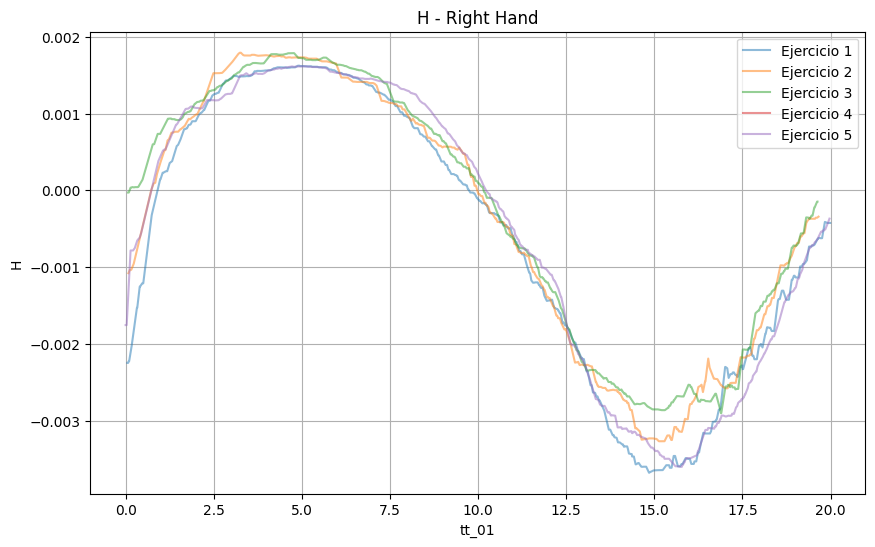

In [ ]:
# Crear una figura
plt.figure(figsize=(10, 6))

# Valor del intervalo para recortar en el eje X
intervalo_x = 100

# Iterar a través de cada ejercicio y crear el gráfico de línea correspondiente
for label in exercise_labels:
    # Filtrar el DataFrame para el ejercicio actual
    exercise_dfD = dfDer[dfDer['Etiqueta'] == label]

    # Filtrar los datos para que solo incluyan valores hasta el intervalo deseado en el eje X
    exercise_dfD = exercise_dfD[exercise_dfD['tt_01'] <= intervalo_x]

    # Crear el gráfico de línea para el ejercicio
    plt.plot(exercise_dfD['tt_01'], exercise_dfD['H'], label=label, alpha=0.5)

# Configurar título y etiquetas de ejes
plt.title('H - Right Hand')
plt.xlabel('tt_01')
plt.ylabel('H')



# Mostrar leyenda con etiquetas de ejercicio
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

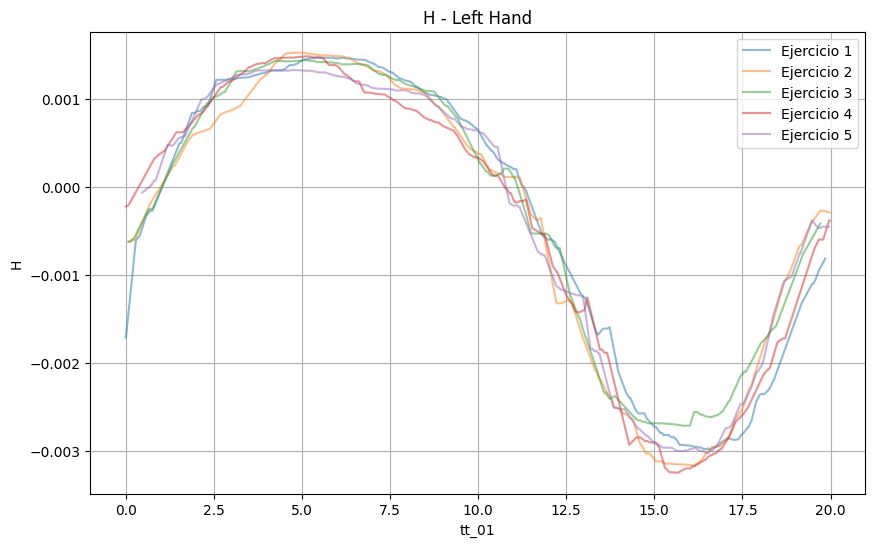

In [ ]:
# Crear una figura
plt.figure(figsize=(10, 6))

# Valor del intervalo para recortar en el eje X
intervalo_x = 100

# Iterar a través de cada ejercicio y crear el gráfico de línea correspondiente
for label in exercise_labels:
    # Filtrar el DataFrame para el ejercicio actual
    exercise_dfD = dfIzq[dfIzq['Etiqueta'] == label]

    # Filtrar los datos para que solo incluyan valores hasta el intervalo deseado en el eje X
    exercise_dfD = exercise_dfD[exercise_dfD['tt_01'] <= intervalo_x]

    # Crear el gráfico de línea para el ejercicio
    plt.plot(exercise_dfD['tt_01'], exercise_dfD['H'], label=label, alpha=0.5)

# Configurar título y etiquetas de ejes
plt.title('H - Left Hand')
plt.xlabel('tt_01')
plt.ylabel('H')

# Mostrar leyenda con etiquetas de ejercicio
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [ ]:
dfDer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3609 entries, 5 to 11162
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tt_01     3609 non-null   float64
 1   pxr_01    3609 non-null   float64
 2   pyr_01    3609 non-null   float64
 3   pzr_01    3609 non-null   float64
 4   vel1_01   3609 non-null   float64
 5   vel2_01   3609 non-null   float64
 6   vel3_01   3609 non-null   float64
 7   H         3609 non-null   float64
 8   Etiqueta  3609 non-null   object 
dtypes: float64(8), object(1)
memory usage: 282.0+ KB


In [ ]:
dfIzq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 0 to 16821
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pxr_01   7216 non-null   float64
 1   pyr_01   7216 non-null   float64
 2   pzr_01   7216 non-null   float64
 3   vel1_01  7216 non-null   float64
 4   vel2_01  7216 non-null   float64
 5   vel3_01  7216 non-null   float64
 6   H        7216 non-null   float64
dtypes: float64(7)
memory usage: 451.0 KB


## Entrenamiento Modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import math


In [ ]:
dfIzq

,tt_01,pxr_01,pyr_01,pzr_01,vel1_01,vel2_01,vel3_01,H,Etiqueta
0,0.00,0.016079,-0.154875,0.014544,0.000000e+00,0.000000e+00,0.000000e+00,-0.001711,Ejercicio 1
1,0.01,0.016079,-0.154875,0.014544,0.000000e+00,0.000000e+00,0.000000e+00,-0.001711,Ejercicio 1
29,0.29,0.018380,-0.151991,0.007894,5.602308e-09,2.160375e-08,-8.893038e-08,-0.000615,Ejercicio 1
33,0.33,0.018392,-0.151944,0.007706,1.212173e-09,4.860144e-09,-1.924189e-08,-0.000589,Ejercicio 1
40,0.40,0.018284,-0.151897,0.007512,1.031460e-08,4.177071e-08,-1.648127e-07,-0.000561,Ejercicio 1
...,...,...,...,...,...,...,...,...,...
16817,24.67,0.012288,-0.153311,0.009711,0.000000e+00,0.000000e+00,0.000000e+00,-0.000811,Ejercicio 5
16818,24.68,0.012288,-0.153311,0.009711,0.000000e+00,0.000000e+00,0.000000e+00,-0.000811,Ejercicio 5
16819,24.69,0.012288,-0.153311,0.009711,0.000000e+00,0.000000e+00,0.000000e+00,-0.000811,Ejercicio 5
16820,24.70,0.012288,-0.153311,0.009711,0.000000e+00,0.000000e+00,0.000000e+00,-0.000811,Ejercicio 5


In [ ]:
dfIzq = dfIzq.drop(columns=['tt_01'])
dfIzq = dfIzq.drop(columns=['Etiqueta'])


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout

X = dfIzq.drop(columns=['H'])
y = dfIzq['H']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train
X_test_scaled = X_test
# Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Configuración de SVR y búsqueda de hiperparámetros


random_forest = RandomForestRegressor(n_estimators=10, random_state=42)
random_forest.fit(X_train_scaled, y_train)


# ANN (Red Neuronal Artificial)
ann_model = Sequential()
ann_model.add(Dense(units=50, activation='relu', input_dim=6))
ann_model.add(Dense(units=30, activation='relu'))
ann_model.add(Dense(units=1))
ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0)
ann_model.summary()

# Evaluación de modelos
models = [linear_model, random_forest, ann_model]
model_names = ['Regresión Lineal', 'RandomForestRegressor', 'ANN']

for i, model in enumerate(models):
    X_test_model = X_test_scaled
    y_pred = model.predict(X_test_model)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_names[i]} - MSE: {format(mse, ".2e")}, R2: {r2:.4f}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                350       
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1911 (7.46 KB)
Trainable params: 1911 (7.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Regresión Lineal - MSE: 4.81e-08, R2: 0.9826
RandomForestRegressor - MSE: 7.27e-11, R2: 1.0000
16/16 [==============================] - 0s 3ms/step
ANN - MSE: 4.21e-08, R2: 0.9848


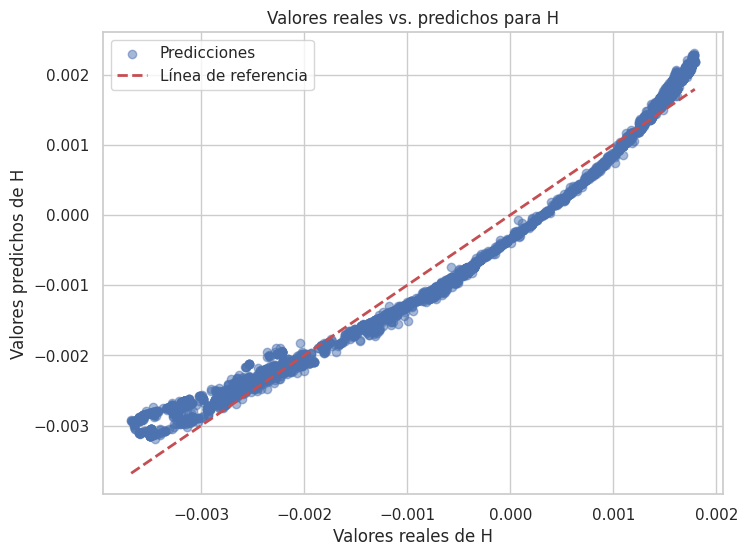

In [ ]:
# Realizar predicciones de H
y_pred = linear_model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, c='b', label='Predicciones', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Línea de referencia')
plt.xlabel("Valores reales de H")
plt.ylabel("Valores predichos de H")
plt.title("Valores reales vs. predichos para H")
plt.legend()
plt.show()

In [ ]:
coeficientes_beta = linear_model.coef_
intercepto_beta = linear_model.intercept_

print("Coeficientes Beta:", coeficientes_beta)
print("Intercepto Beta:", intercepto_beta)

Coeficientes Beta: [-1.92673865e-03 -9.94204512e-02 -1.30339582e-01 -8.62461206e-01
 -1.17114833e+01 -4.46556299e+01]
Intercepto Beta: -0.015103832648694852


In [ ]:
arboles = random_forest.estimators_

print("Coeficientes Beta:", arboles)


Coeficientes Beta: [DecisionTreeRegressor(max_features=1.0, random_state=1608637542), DecisionTreeRegressor(max_features=1.0, random_state=1273642419), DecisionTreeRegressor(max_features=1.0, random_state=1935803228), DecisionTreeRegressor(max_features=1.0, random_state=787846414), DecisionTreeRegressor(max_features=1.0, random_state=996406378), DecisionTreeRegressor(max_features=1.0, random_state=1201263687), DecisionTreeRegressor(max_features=1.0, random_state=423734972), DecisionTreeRegressor(max_features=1.0, random_state=415968276), DecisionTreeRegressor(max_features=1.0, random_state=670094950), DecisionTreeRegressor(max_features=1.0, random_state=1914837113)]


In [ ]:
dfDer

,tt_01,pxr_01,pyr_01,pzr_01,vel1_01,vel2_01,vel3_01,H,Etiqueta
5,0.05,0.019254,-0.156794,0.016315,1.719204e-05,7.165621e-13,1.168232e-06,-0.002248,Ejercicio 1
6,0.06,0.019254,-0.156794,0.016315,3.719289e-07,0.000000e+00,2.527335e-08,-0.002248,Ejercicio 1
7,0.07,0.019254,-0.156794,0.016315,8.046228e-09,0.000000e+00,5.467582e-10,-0.002248,Ejercicio 1
9,0.09,0.019261,-0.156774,0.016220,9.125312e-06,2.849670e-05,-1.342903e-04,-0.002226,Ejercicio 1
10,0.10,0.019261,-0.156774,0.016220,1.974150e-07,6.164914e-07,-2.905207e-06,-0.002226,Ejercicio 1
...,...,...,...,...,...,...,...,...,...
10785,19.83,0.019165,-0.154028,0.006952,3.647455e-06,1.715484e-05,-6.737806e-05,-0.000510,Ejercicio 5
10786,19.84,0.019165,-0.154028,0.006952,7.890824e-08,3.711241e-07,-1.457642e-06,-0.000510,Ejercicio 5
10787,19.85,0.019165,-0.154028,0.006952,1.707084e-09,8.028818e-09,-3.153432e-08,-0.000510,Ejercicio 5
10795,19.93,0.019209,-0.153956,0.006283,9.704677e-07,3.821749e-06,-1.482220e-05,-0.000419,Ejercicio 5


In [ ]:
dfDer

,tt_01,pxr_01,pyr_01,pzr_01,vel1_01,vel2_01,vel3_01,H,Etiqueta,Hpred0
5,0.05,0.019254,-0.156794,0.016315,1.719204e-05,7.165621e-13,1.168232e-06,-0.002248,Ejercicio 1,-0.001879
6,0.06,0.019254,-0.156794,0.016315,3.719289e-07,0.000000e+00,2.527335e-08,-0.002248,Ejercicio 1,-0.001879
7,0.07,0.019254,-0.156794,0.016315,8.046228e-09,0.000000e+00,5.467582e-10,-0.002248,Ejercicio 1,-0.001879
9,0.09,0.019261,-0.156774,0.016220,9.125312e-06,2.849670e-05,-1.342903e-04,-0.002226,Ejercicio 1,-0.001876
10,0.10,0.019261,-0.156774,0.016220,1.974150e-07,6.164914e-07,-2.905207e-06,-0.002226,Ejercicio 1,-0.001877
...,...,...,...,...,...,...,...,...,...,...
10785,19.83,0.019165,-0.154028,0.006952,3.647455e-06,1.715484e-05,-6.737806e-05,-0.000510,Ejercicio 5,-0.000518
10786,19.84,0.019165,-0.154028,0.006952,7.890824e-08,3.711241e-07,-1.457642e-06,-0.000510,Ejercicio 5,-0.000518
10787,19.85,0.019165,-0.154028,0.006952,1.707084e-09,8.028818e-09,-3.153432e-08,-0.000510,Ejercicio 5,-0.000515
10795,19.93,0.019209,-0.153956,0.006283,9.704677e-07,3.821749e-06,-1.482220e-05,-0.000419,Ejercicio 5,-0.000404


In [ ]:
# Realizar la predicción
X_pred = dfDer.drop(columns=['tt_01', 'Etiqueta', 'H'])  # Excluir columnas que no se usan para predecir
dfDer['Hpred0'] = random_forest.predict(X_pred)  # Agregar una columna 'Hpred0' con las predicciones

y_pred_rf = random_forest.predict(X_pred)
mse_rf = mean_squared_error(dfDer['H'], y_pred_rf)
r2_rf = r2_score(dfDer['H'], y_pred_rf)
print(f'Random Forest - MSE: {mse_rf:.2e}, R2: {r2_rf:.4f}')

Random Forest - MSE: 2.99e-08, R2: 0.9907


In [ ]:
dfIzq

,pxr_01,pyr_01,pzr_01,vel1_01,vel2_01,vel3_01,H
0,0.016079,-0.154875,0.014544,0.000000e+00,0.000000e+00,0.000000e+00,-0.001711
1,0.016079,-0.154875,0.014544,0.000000e+00,0.000000e+00,0.000000e+00,-0.001711
29,0.018380,-0.151991,0.007894,5.602308e-09,2.160375e-08,-8.893038e-08,-0.000615
33,0.018392,-0.151944,0.007706,1.212173e-09,4.860144e-09,-1.924189e-08,-0.000589
40,0.018284,-0.151897,0.007512,1.031460e-08,4.177071e-08,-1.648127e-07,-0.000561
...,...,...,...,...,...,...,...
16341,0.017974,-0.154076,0.006674,0.000000e+00,0.000000e+00,0.000000e+00,-0.000456
16342,0.017974,-0.154076,0.006674,0.000000e+00,0.000000e+00,0.000000e+00,-0.000456
16343,0.017974,-0.154076,0.006674,0.000000e+00,0.000000e+00,0.000000e+00,-0.000456
16344,0.017974,-0.154076,0.006674,0.000000e+00,0.000000e+00,0.000000e+00,-0.000456


In [ ]:
rms = np.sqrt(np.mean(np.square(y_pred_rf)))

In [ ]:
print("RMS:",rms)

RMS: 0.0016975097847461652


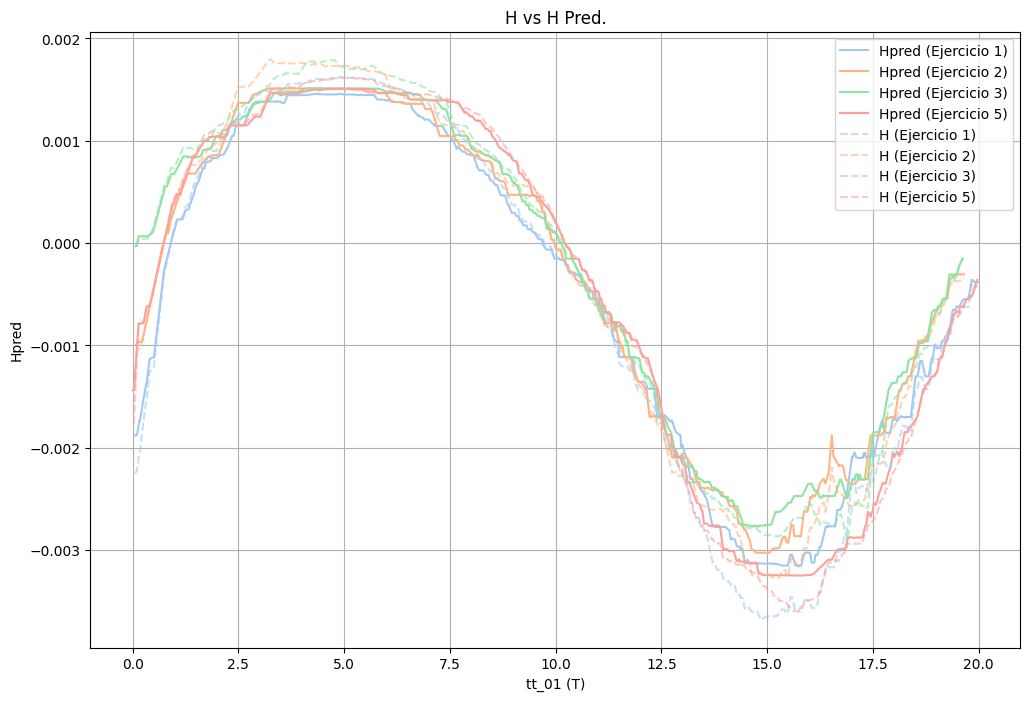

In [ ]:
ejercicios_unicos = dfDer['Etiqueta'].unique()

# Paleta de colores más suaves
colores_suaves = sns.color_palette("pastel", len(ejercicios_unicos))

plt.figure(figsize=(12, 8))

# Iterar sobre cada ejercicio y graficar Hpred0 con colores diferentes
for i, ejercicio in enumerate(ejercicios_unicos):
    sub_df = dfDer[dfDer['Etiqueta'] == ejercicio]
    plt.plot(sub_df['tt_01'], sub_df['Hpred0'], label=f'Hpred ({ejercicio})', color=colores_suaves[i])

# Superponer H en el mismo gráfico con colores suaves y atenuados
for i, ejercicio in enumerate(ejercicios_unicos):
    sub_df = dfDer[dfDer['Etiqueta'] == ejercicio]
    plt.plot(sub_df['tt_01'], sub_df['H'], label=f'H ({ejercicio})', linestyle='--', alpha=0.6, color=colores_suaves[i])

plt.title('H vs H Pred.')
plt.xlabel('tt_01 (T)')
plt.ylabel('Hpred')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def activo1Pred(archivonombre,archivoSave,nombreGrafica):
  file_list = [archivonombre]

  dataframes = []
  # Agregar nombres de columnas
  column_names = ['tr_01', 'pxr_01', 'pyr_01', 'pzr_01', 'pxdr_01', 'pydr_01', 'pzdr_01',
                  'q1r_01', 'tau0_01', 'tau1_01', 'tau2_01', 'vel1_01', 'vel2_01',
                  'vel3_01', 'veld1_01', 'veld2_01', 'veld3_01']
  dataframes = []
  activo1_DF = []
  # Leer y ajustar los DataFrames individuales
  for file in file_list:
      df = pd.read_csv(file, sep='\t')
      df.columns = column_names

      df = df.reset_index(drop=True)  # Restablecer el índice para cada DataFrame

      dataframes.append(df)


  # Concatenar los DataFrames en uno solo
  activo1_DF = pd.concat(dataframes, ignore_index=True)

  activo1_DF['pxr_01'] = activo1_DF['pxr_01'] * 0.001
  activo1_DF['pyr_01'] = activo1_DF['pyr_01'] * 0.001
  activo1_DF['pzr_01'] = activo1_DF['pzr_01'] * 0.001
  activo1_DF['vel1_01'] = activo1_DF['vel1_01'] * 0.001
  activo1_DF['vel2_01'] = activo1_DF['vel2_01'] * 0.001
  activo1_DF['vel3_01'] = activo1_DF['vel3_01'] * 0.001

    # Verificar la estructura del DataFrame resultante
  X_predAc1 = activo1_DF.drop(columns=['tr_01', 'pxdr_01', 'pydr_01', 'pzdr_01',
                'q1r_01', 'tau0_01', 'tau1_01', 'tau2_01', 'veld1_01', 'veld2_01', 'veld3_01'])


  # Realizar la predicción Activo 1
  activo1_DF['Hpred0'] = random_forest.predict(X_predAc1)  # Agregar una columna 'Hpred0' con las predicciones

  rms = np.sqrt(np.mean(np.square(activo1_DF['Hpred0'])))
  print("Error rms "+archivonombre, rms)
  if (archivonombre == "a1_salama_der_02.txt"):
      print("SIiiiiiiiiii ",activo1_DF.shape)
      activo1_DF = activo1_DF.iloc[600:].reset_index(drop=True)
      print("SIiiiiiiiiii ",activo1_DF.shape)
  valor_inicial = 0
  for i in range(len(activo1_DF)):
      activo1_DF.at[i, 'tr_01'] = valor_inicial
      valor_inicial += 0.001

  activo1_DF.to_csv(archivoSave, index=False)

  # plt.figure(figsize=(12, 8))

  # plt.plot(activo1_DF['tr_01'], activo1_DF['Hpred0'], label='Hpred0', color='blue')

  # plt.title(nombreGrafica)
  # plt.xlabel('tt_01 (T)')
  # plt.ylabel('Valores de Hpred0 y H')
  # plt.legend()
  # plt.grid(True)
  # plt.show()

  # fig = px.scatter_3d(activo1_DF, x='pxr_01', y='pyr_01', z='pzr_01', color_continuous_scale='viridis')
  # fig.update_layout(scene=dict(xaxis_title='pxr_01', yaxis_title='pyr_01', zaxis_title='pzr_01'))
  # fig.show()

  return activo1_DF

In [ ]:
# file_list = ['a1_salama_der_01.txt', 'a1_salama_der_02.txt', 'a1_salama_der_03.txt', 'a1_salama_der_04.txt', 'a1_salama_der_05.txt',
#              'a1_salama_izq_01.txt', 'a1_salama_izq_02.txt', 'a1_salama_izq_03.txt', 'a1_salama_izq_04.txt', 'a1_salama_izq_05.txt']
print("Activo 1")

activo1Pred('a1_salama_izq_01.txt','a1_salama_izq_Pred01.csv','a1_salama_izq_01')
activo1Pred('a1_salama_izq_02.txt','a1_salama_izq_Pred02.csv','a1_salama_izq_02')
activo1Pred('a1_salama_izq_03.txt','a1_salama_izq_Pred03.csv','a1_salama_izq_03')
activo1Pred('a1_salama_izq_04.txt','a1_salama_izq_Pred04.csv','a1_salama_izq_04')
activo1Pred('a1_salama_izq_05.txt','a1_salama_izq_Pred05.csv','a1_salama_izq_05')

activo1Pred('a1_salama_der_01.txt','a1_salama_der_Pred01.csv','a1_salama_der_01')
activo1Pred('a1_salama_der_02.txt','a1_salama_der_Pred02.csv','a1_salama_der_02')
activo1Pred('a1_salama_der_03.txt','a1_salama_der_Pred03.csv','a1_salama_der_03')
activo1Pred('a1_salama_der_04.txt','a1_salama_der_Pred04.csv','a1_salama_der_04')
activo1Pred('a1_salama_der_05.txt','a1_salama_der_Pred05.csv','a1_salama_der_05')

print("Activo 2")
# file_list = ['a2_salama_der_01.txt','a2_salama_der_02.txt','a2_salama_der_03.txt','a2_salama_der_04.txt','a2_salama_der_05.txt',
#              'a2_salama_izq_01.txt','a2_salama_izq_02.txt','a2_salama_izq_03.txt','a2_salama_izq_04.txt','a2_salama_izq_05.txt']

activo1Pred('a2_salama_izq_01.txt','a2_salama_izq_Pred01.csv','a2_salama_izq_01')
activo1Pred('a2_salama_izq_02.txt','a2_salama_izq_Pred02.csv','a2_salama_izq_02')
activo1Pred('a2_salama_izq_03.txt','a2_salama_izq_Pred03.csv','a2_salama_izq_03')
activo1Pred('a2_salama_izq_04.txt','a2_salama_izq_Pred04.csv','a2_salama_izq_04')
activo1Pred('a2_salama_izq_05.txt','a2_salama_izq_Pred05.csv','a2_salama_izq_05')

activo1Pred('a2_salama_der_01.txt','a2_salama_der_Pred01.csv','a2_salama_der_01')
activo1Pred('a2_salama_der_02.txt','a2_salama_der_Pred02.csv','a2_salama_der_02')
activo1Pred('a2_salama_der_03.txt','a2_salama_der_Pred03.csv','a2_salama_der_03')
activo1Pred('a2_salama_der_04.txt','a2_salama_der_Pred04.csv','a2_salama_der_04')
activo1Pred('a2_salama_der_05.txt','a2_salama_der_Pred05.csv','a2_salama_der_05')



Activo 1
Error rms a1_salama_izq_01.txt 0.0008812961234439697
Error rms a1_salama_izq_02.txt 0.0008326247922450636
Error rms a1_salama_izq_03.txt 0.0009425664842453281
Error rms a1_salama_izq_04.txt 0.0011245049998103703
Error rms a1_salama_izq_05.txt 0.0009698026791450443
Error rms a1_salama_der_01.txt 0.0015016395029329769
Error rms a1_salama_der_02.txt 0.0022741634970012818
SIiiiiiiiiii  (1885, 18)
SIiiiiiiiiii  (1285, 18)
Error rms a1_salama_der_03.txt 0.0017049000796761661
Error rms a1_salama_der_04.txt 0.0014964730726013864
Error rms a1_salama_der_05.txt 0.001360011260862394
Activo 2
Error rms a2_salama_izq_01.txt 0.0010191005854830067
Error rms a2_salama_izq_02.txt 0.0010426888754873163
Error rms a2_salama_izq_03.txt 0.0009421752306520932
Error rms a2_salama_izq_04.txt 0.00114749192378657
Error rms a2_salama_izq_05.txt 0.0009715607293248786
Error rms a2_salama_der_01.txt 0.000788189464134942
Error rms a2_salama_der_02.txt 0.001027647194655549
Error rms a2_salama_der_03.txt 0.000

,tr_01,pxr_01,pyr_01,pzr_01,pxdr_01,pydr_01,pzdr_01,q1r_01,tau0_01,tau1_01,tau2_01,vel1_01,vel2_01,vel3_01,veld1_01,veld2_01,veld3_01,Hpred0
0,0.000,0.011816,-0.088375,0.004430,0,0,0,0,0,0,0,-2.244548e-03,0.0,-1.617966e-04,0,0,0,-0.000163
1,0.001,0.011816,-0.088375,0.004430,0,0,0,0,0,0,0,-3.527950e-05,0.0,-2.543097e-06,0,0,0,-0.000163
2,0.002,0.011816,-0.088375,0.004430,0,0,0,0,0,0,0,-1.122590e-07,0.0,-8.092108e-09,0,0,0,-0.000163
3,0.003,0.011816,-0.088375,0.004430,0,0,0,0,0,0,0,-1.281964e-09,0.0,-9.240942e-11,0,0,0,-0.000163
4,0.004,0.011816,-0.088375,0.004430,0,0,0,0,0,0,0,-7.727738e-12,0.0,-5.570484e-13,0,0,0,-0.000163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1.498,0.009453,-0.087548,0.001934,0,0,0,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0,0,0,0.000103
1499,1.499,0.009453,-0.087548,0.001934,0,0,0,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0,0,0,0.000103
1500,1.500,0.009453,-0.087548,0.001934,0,0,0,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0,0,0,0.000103
1501,1.501,0.009453,-0.087548,0.001934,0,0,0,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0,0,0,0.000103


In [ ]:
def unifiarArchivos(listnameFile, guardarUnificadoName):
  file_list = listnameFile
  exercise_labels = ['Ejercicio 1', 'Ejercicio 2', 'Ejercicio 3', 'Ejercicio 4', 'Ejercicio 5']

  # Crear una lista para almacenar los DataFrames
  dataframes = []
  dfDer = []
  # Leer cada archivo y agregar la etiqueta correspondiente
  for file, label in zip(file_list, exercise_labels):
      dfDer = pd.read_csv(file, sep=',')
      # Agregar una columna "Etiqueta" con el nombre del ejercicio
      dfDer['Etiqueta'] = label
      dataframes.append(dfDer)
      if (file=="a1_salama_der_Pred02.csv"):
        print(dfDer.shape)
  # Concatenar los DataFrames en uno solo
  dfDer = pd.concat(dataframes, ignore_index=True)

  # Guardar el DataFrame unificado en un archivo CSV
  dfDer.to_csv(guardarUnificadoName, index=False)
  return dfDer

In [ ]:
listFileDerA1 = ['a1_salama_der_Pred01.csv','a1_salama_der_Pred02.csv','a1_salama_der_Pred03.csv','a1_salama_der_Pred04.csv','a1_salama_der_Pred05.csv']
listFileIzqA1 = ['a1_salama_izq_Pred01.csv','a1_salama_izq_Pred02.csv','a1_salama_izq_Pred03.csv','a1_salama_izq_Pred04.csv','a1_salama_izq_Pred05.csv']

listFileDerA2 = ['a2_salama_der_Pred01.csv','a2_salama_der_Pred02.csv','a2_salama_der_Pred03.csv','a2_salama_der_Pred04.csv','a2_salama_der_Pred05.csv']
listFileIzqA2 = ['a2_salama_izq_Pred01.csv','a2_salama_izq_Pred02.csv','a2_salama_izq_Pred03.csv','a2_salama_izq_Pred04.csv','a2_salama_izq_Pred05.csv']

dfDerA1 = unifiarArchivos(listFileDerA1,'unificadoA1DerPred.csv')
dfIzqA1 = unifiarArchivos(listFileIzqA1,'unificadoA1IzqPred.csv')
dfDerA2 = unifiarArchivos(listFileDerA2,'unificadoA2DerPred.csv')
dfIzqA2 = unifiarArchivos(listFileIzqA2,'unificadoA1IzqPred.csv')

(1285, 19)


In [ ]:
def graficarPredHA1_A2(dfIzq,titulo):
  # Crear una figura
  plt.figure(figsize=(10, 6))

  # Iterar a través de cada ejercicio y crear el gráfico de línea correspondiente
  for label in exercise_labels:
      # Filtrar el DataFrame para el ejercicio actual
      exercise_dfI = dfIzq[dfIzq['Etiqueta'] == label]

      # Crear el gráfico de línea para el ejercicio
      plt.plot(exercise_dfI['tr_01'], exercise_dfI['Hpred0'], label=label, alpha=0.5)

  # Configurar título y etiquetas de ejes
  plt.title(titulo)
  plt.xlabel('tt_01')
  plt.ylabel('H')

  # Mostrar leyenda con etiquetas de ejercicio
  plt.legend()

  # Mostrar el gráfico
  plt.grid(True)
  plt.show()

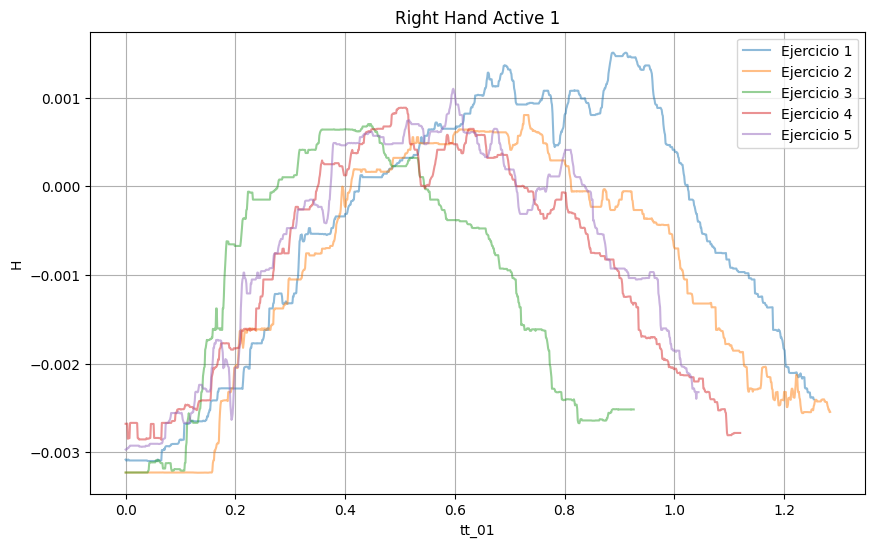

In [ ]:
graficarPredHA1_A2(dfDerA1,"Right Hand Active 1")

# Datos Flor

In [ ]:
def limpiarAtipicos(dfF1):
  Q1 = dfF1.quantile(0.25)
  Q3 = dfF1.quantile(0.75)
  IQR = Q3 - Q1
  # Definir un umbral para identificar valores atípicos
  outlier_threshold = 1.5
  # Filtrar los valores atípicos
  dfF1 = dfF1[~((dfF1 < (Q1 - outlier_threshold * IQR)) | (dfF1 > (Q3 + outlier_threshold * IQR))).any(axis=1)]
  return dfF1
def eliminacionVariables(dfF):
  dfF = dfF.drop(columns=['tau0_01'])
  dfF = dfF.drop(columns=['tau1_01'])
  dfF = dfF.drop(columns=['tau2_01'])

  dfF = dfF.drop(columns=['pydr_01'])
  dfF = dfF.drop(columns=['pxdr_01'])
  dfF = dfF.drop(columns=['pzdr_01'])

  dfF = dfF.drop(columns=['veld1_01'])
  dfF = dfF.drop(columns=['veld2_01'])
  dfF = dfF.drop(columns=['veld3_01'])

  #df = df.drop(columns=['pyr_01'])
  #df = df.drop(columns=['pxr_01'])
  #df = df.drop(columns=['pzr_01'])

  #df = df.drop(columns=['vel1_01'])
  #df = df.drop(columns=['vel2_01'])
  #df = df.drop(columns=['vel3_01'])

  dfF = dfF.drop(columns=['q1r_01'])

  #df = df.drop(columns=['tt_01'])
  return dfF
def leerArchivo(file):
  # dataframes = []
  # for file in file_list:
  #     df = pd.read_csv(file, sep='\t')
  #     dataframes.append(df)

  # dfF = pd.concat(dataframes, ignore_index=True)
  #dfF.to_csv('archivo_unificado.csv', index=False)

  dfF = pd.read_csv(file, sep='\t')
  dfF = eliminacionVariables(dfF)
  dfF = limpiarAtipicos(dfF)
  return dfF
def graficarEnergia(dfF1_,dfF2_,experimento):
# Gráfica de Energía del primer archivo
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.scatter(dfF1_['tt_01'], dfF1_['Var18'], color='blue', alpha=0.5)
  plt.title('Gráfica de H en función de tt_01 (Der) '+experimento)
  plt.xlabel('tt_01')
  plt.ylabel('H')
  plt.grid(True)

  # Gráfica de Energía del segundo archivo
  plt.subplot(1, 2, 2)
  plt.scatter(dfF2_['tt_01'], dfF2_['Var18'], color='red', alpha=0.5)
  plt.title('Gráfica de H en función de tt_01 (Izq) '+experimento)
  plt.xlabel('tt_01')
  plt.ylabel('H')
  plt.grid(True)

  # Ajustar el espacio entre subplots
  plt.tight_layout()

  # Mostrar la figura
  plt.show()

def graficarPosicion(dfF1_,dfF2_,experimento):
 # Gráfica de Posición del primer archivo
  fig = px.scatter_3d(dfF1_, x='pxr_01', y='pyr_01', z='pzr_01', color_continuous_scale='viridis')
  fig.update_layout(scene=dict(xaxis_title='Position', yaxis_title='pyr_01', zaxis_title='pzr_01'))
  fig.update_layout(title='Gráfica de Posición 3D (Der) '+experimento)
  fig.show()

  # Gráfica de Posición del segundo archivo
  fig = px.scatter_3d(dfF2_, x='pxr_01', y='pyr_01', z='pzr_01', color_continuous_scale='viridis')
  fig.update_layout(scene=dict(xaxis_title='Position', yaxis_title='pyr_01', zaxis_title='pzr_01'))
  fig.update_layout(title='Gráfica de Posición 3D (Izq) '+experimento)
  fig.show()

## Energia y Posicion Ejercicio 1


In [ ]:
dfF1_1 = leerArchivo('flor_pasivo_der_01.txt')
dfF2_1 = leerArchivo('flor_pasivo_izq_01.txt')
graficarPosicion(dfF1_1,dfF2_1,'Experimento 1')
graficarEnergia(dfF1_1,dfF2_1,'Experimento 1')

## Energia y Posicion Ejercicio 2


In [ ]:
dfF1_2 = leerArchivo('flor_pasivo_der_02.txt')
dfF2_2 = leerArchivo('flor_pasivo_izq_02.txt')
graficarPosicion(dfF1_2,dfF2_2,'Experimento 2')
graficarEnergia(dfF1_2,dfF2_2,'Experimento 2')

## Energia y Posicion Ejercicio 3


In [ ]:
dfF1_3 = leerArchivo('flor_pasivo_der_02.txt')
dfF2_3 = leerArchivo('flor_pasivo_izq_02.txt')
graficarPosicion(dfF1_3,dfF2_3,'Experimento 2')
graficarEnergia(dfF1_3,dfF2_3,'Experimento 2')

## Prediccion

In [ ]:
def predecir(dfFlor):
  dfFlor = dfFlor.drop(columns=['tt_01'])
  XFlor = dfFlor.drop(columns=['Var18'])
  yFlor = dfFlor['Var18']
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  #X_test_scaled = scaler.transform(X_test)
  y_pred_rf_ = random_forest.predict(XFlor)

  mse_rf = mean_squared_error(yFlor, y_pred_rf_)
  r2_rf = r2_score(yFlor, y_pred_rf_)
  print("MSE ERROR "+str(mse_rf))
  print("R2 "+str(r2_rf))
  return y_pred_rf_
def unirDFyPredecir(df1F, df2F):

  return predecir(pd.concat([df1F, df2F])),pd.concat([df1F, df2F])

def graficarHpred(df_con_prediccion):
  plt.figure(figsize=(10, 6))
  plt.plot(df_con_prediccion['tt_01'], df_con_prediccion['Var18'], label='Real', color='blue', marker='o', linestyle='-', markersize=4)
  plt.plot(df_con_prediccion['tt_01'], df_con_prediccion['Prediccion'], label='Prediccion', color='red', marker='x', linestyle='--', markersize=4)
  plt.xlabel('tt_01')
  plt.ylabel('Valor')
  plt.title('Real vs Predicho')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
dfP, dfConcat = unirDFyPredecir(dfF1_1, dfF2_1)
dfConcat['Prediccion'] = dfP
graficarHpred(dfConcat)

In [ ]:
dfP, dfConcat = unirDFyPredecir(dfF1_2, dfF2_2)
dfConcat['Prediccion'] = dfP
graficarHpred(dfConcat)

In [ ]:
dfP, dfConcat = unirDFyPredecir(dfF1_3, dfF2_3)
dfConcat['Prediccion'] = dfP
graficarHpred(dfConcat)